In [1]:
from __future__ import print_function
from fenics import *
import matplotlib.pyplot as plt
import fenics as fe

## Mesh Generation

In [2]:
n_elements= 32
mesh = UnitIntervalMesh(n_elements)

## Create Function Space

In [3]:
#Define a Function Space
lagrange_polynomial_space_first_order= FunctionSpace(
mesh,
'Lagrange',
1)

## Boundary Conditions

In [4]:
#Value of solution on the boundary

u_on_boundary = Constant(0.0)

#Function to return whether we are on the boundary

def boundary_boolean_function(x, on_boundary):
    return on_boundary

#Homogenous Dirichlet BC

boundary_condition= DirichletBC(lagrange_polynomial_space_first_order,
                               u_on_boundary, boundary_boolean_function)



## Initial Condition
* Initial Condition is u(t=0, x) = sin(pi*x)

In [5]:
initial_condition = Expression(
"sin(3.141*x[0])",
degree=1
)

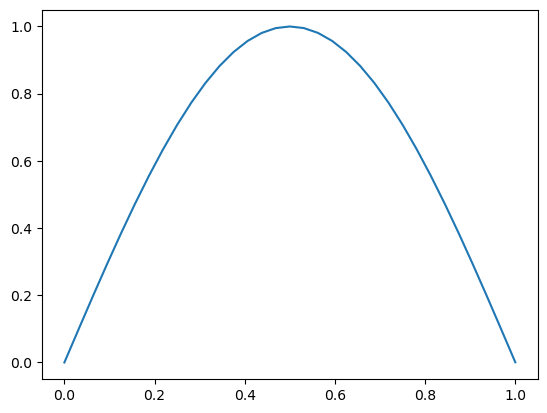

In [6]:
# Discretize initial condition on function space

u_old = interpolate(
        initial_condition,
        lagrange_polynomial_space_first_order
        )

plt.figure()
plot(u_old, label='t=0.0')

In [7]:
# The time stepping of the implicit Eule discretization (=dt)

time_step_length = 0.1

#Forcing on the RHS of PDE

heat_source = Constant(0.0)



## Finite Element Problem

In [8]:
# Create fe problem

u_trial = TrialFunction(lagrange_polynomial_space_first_order)
v_test = TestFunction(lagrange_polynomial_space_first_order)

weak_form_residuum = (
    u_trial*v_test*dx
    +
    time_step_length*dot(
    grad(u_trial),
    grad(v_test),
    )*dx
    -
    (
        u_old*v_test*dx
        +
        time_step_length*heat_source*v_test*dx
    )
)

In [9]:
#Linear PDE that is separable into a LHS and RHS

weak_form_lhs = lhs(weak_form_residuum)
weak_form_rhs= rhs(weak_form_residuum)

In [10]:

u_solution =Function(lagrange_polynomial_space_first_order)

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


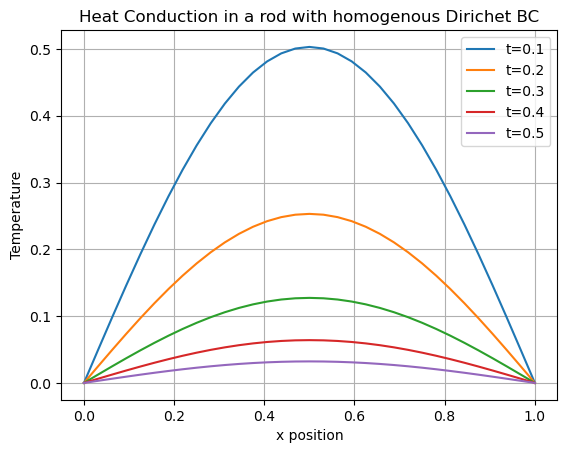

In [11]:
#function will be solving for each point in time

n_time_steps = 5
time_current = 0.0


for i in range(n_time_steps):
    time_current+=time_step_length
    
    #finite element assembly, BC imprint,  and solving the linear system
    
    solve(
        weak_form_lhs==weak_form_rhs, 
    u_solution,
    boundary_condition,)
    
    u_old.assign(u_solution)
    fe.plot(u_solution, label=f't={time_current:1.1f}')

plt.plot()
plt.legend()
plt.title('Heat Conduction in a rod with homogenous Dirichet BC')
plt.xlabel('x position')
plt.ylabel('Temperature')
plt.grid()
plt.show()
